In [9]:
#imports 
import pandas as pd
import numpy as np
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
from matplotlib.pyplot import scatter
from scipy import stats as sp
import impyute as impy
%matplotlib inline
import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn import metrics
import seaborn as sns 
from sklearn import linear_model
from sklearn import svm
from pytz import timezone
from datetime import datetime
import pickle
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [113]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Check twint data completeness

In [4]:
def check(data):
    data = data.copy()
    data['datetime'] = (data['date'] + ' ' + data['time'])
    data.datetime = pd.to_datetime(data.datetime)
    data.set_index('datetime', inplace=True)
    data.sort_index(inplace=True)
    display(data)

In [5]:
df = pd.read_csv('ripple_20q2.csv')
check(df)

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
datetime,,,,,,,,,,,,,,,,,,,,,
2020-04-01 02:00:02,1245138818157682688,1245138818157682688,2020-04-01 02:00:02 CEST,2020-04-01,02:00:02,200,948703871484006400,status_crypto,Crypto Status,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2020-04-01 02:00:02,1245138819613155336,1245138819613155336,2020-04-01 02:00:02 CEST,2020-04-01,02:00:02,200,1169242641055268867,coinkactl,Coin Kaç TL?,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2020-04-01 02:00:03,1245138820460433413,1245138820460433413,2020-04-01 02:00:03 CEST,2020-04-01,02:00:03,200,2539989348,bitapeso,Bit A Peso,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2020-04-01 02:00:08,1245138841817829377,1245138841817829377,2020-04-01 02:00:08 CEST,2020-04-01,02:00:08,200,290753747,nishihr,Glenn Nishimura,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2020-04-01 02:00:44,1245138995178278912,1245138995178278912,2020-04-01 02:00:44 CEST,2020-04-01,02:00:44,200,1947301,thenation,The Nation,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-30 01:59:12,1277753516119875586,1277753516119875586,2020-06-30 01:59:12 CEST,2020-06-30,01:59:12,200,796471157159399424,james5007_nt,James5007,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2020-06-30 01:59:14,1277753523153887239,1277753523153887239,2020-06-30 01:59:14 CEST,2020-06-30,01:59:14,200,1011389421147623425,dhirajbhasin2,DhirajjBhasin,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2020-06-30 01:59:14,1277753523153887239,1277753523153887239,2020-06-30 01:59:14 CEST,2020-06-30,01:59:14,200,1011389421147623425,dhirajbhasin2,DhirajjBhasin,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


# Importing TWINT data

In [74]:
# Ethereum 
eth_0 = pd.read_csv('$eth.csv')
eth_1 = pd.read_csv('$eth2.csv')
eth_2 = pd.read_csv('$eth3.csv')
eth_3 = pd.read_csv('ethereum.csv')
eth_4 = pd.read_csv('ethereum2.csv')
eth_5 = pd.read_csv('ethereum3.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [75]:
eth = combineclean([eth_0, eth_1, eth_2, eth_3, eth_4, eth_5])

Started with 5041492 rows
Ended with 3988345 rows. Dropped 1053147 rows.


In [93]:
eth.head(0)

,tweet
datetime,


In [2]:
# bnb dfs
bnb_1 = pd.read_csv('$bnb.csv')
bnb_2 = pd.read_csv('binance coin.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
bnb = combineclean([bnb_1, bnb_2])

Started with 595175 rows
Ended with 524303 rows. Dropped 70872 rows.


In [94]:
bnb.head(0)

,tweet
datetime,


In [15]:
# xrp dfs
xrp_0 = pd.read_csv('$xrp.csv')
xrp_1 = pd.read_csv('$xrp2.csv')
xrp_2 = pd.read_csv('$xrp3.csv')
xrp_3 = pd.read_csv('ripple_19q1.csv')
xrp_4 = pd.read_csv('ripple_19q2.csv')
xrp_5 = pd.read_csv('ripple_19q3.csv')
xrp_6 = pd.read_csv('ripple_19q4.csv')
xrp_7 = pd.read_csv('ripple20q1.csv')
xrp_8 = pd.read_csv('ripple_20q2.csv')
xrp_9 = pd.read_csv('ripple_20q3p1.csv')
xrp_10 = pd.read_csv('ripple_20q3.csv')
xrp_11 = pd.read_csv('ripple_20q4p1.csv')
xrp_12 = pd.read_csv('ripple_20q4p2.csv')
xrp_13 = pd.read_csv('ripple_20q4.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [16]:
xrp = combineclean([xrp_0,xrp_1,xrp_2,xrp_3,xrp_4,xrp_5,xrp_6,xrp_7,xrp_8,xrp_9,xrp_10,xrp_11,xrp_12,xrp_13])

Started with 4029927 rows
Ended with 3290712 rows. Dropped 739215 rows.


In [17]:
# ltc dfs
ltc_1 = pd.read_csv('$ltc.csv')
ltc_2 = pd.read_csv('$ltc_p2.csv')
ltc_3 = pd.read_csv('$ltc_p3.csv')
ltc_4 = pd.read_csv('$ltc_p4.csv')
ltc_5 = pd.read_csv('litecoin.csv')
ltc_6 = pd.read_csv('litecoin2.csv')
ltc_7 = pd.read_csv('litecoin3.csv')

In [18]:
ltc = combineclean([ltc_1,ltc_2,ltc_3,ltc_4,ltc_5,ltc_6,ltc_7])

Started with 1542325 rows
Ended with 1257776 rows. Dropped 284549 rows.


In [80]:
ltc

,tweet
datetime,
2019-01-01 01:00:00+00:00,Happy New Year! 🎆 Let’s make 2019 an awesome ...
2019-01-01 01:00:02+00:00,"Bitcoin @ £3,157.97 | Ethereum @ £115.15 | Lit..."
2019-01-01 01:00:03+00:00,#BTC #bitcoin $3696.22 #ETH #ethereum $131.39 ...
2019-01-01 01:00:10+00:00,Last litecoin price on bitstamp: $ 29.9
2019-01-01 01:00:10+00:00,What percentage should you invest in each cryp...
...,...
2020-12-31 00:56:54+00:00,Let's see if it's work @RookieXBT $LTC https...
2020-12-31 00:57:47+00:00,$NXTD BOUNCING AFTERHOUR! Adding heavy $trx $...
2020-12-31 00:59:18+00:00,Cryptocurrencies $ETH $LTC $DASH $XMR $ZCASH ...


In [19]:
# Link 
link_0 = pd.read_csv('$link.csv')
link_1 = pd.read_csv('chainlink2.csv')
link_2 = pd.read_csv('chainlink.csv')

In [20]:
link = combineclean([link_0,link_1,link_2])

Started with 1463116 rows
Ended with 805902 rows. Dropped 657214 rows.


In [21]:
# Bitcoin Cash 
bch_0 = pd.read_csv('$bch.csv')
bch_1 = pd.read_csv('$bch2.csv')
bch_2 = pd.read_csv('bitcoin cash.csv')
bch_3 = pd.read_csv('bitcoin cash2.csv')
bch_4 = pd.read_csv('bitcoin cash3.csv')
bch_5 = pd.read_csv('bitcoin cash4.csv')

In [22]:
bch = combineclean([bch_0,bch_1,bch_2,bch_3,bch_4,bch_5])

Started with 909829 rows
Ended with 778037 rows. Dropped 131792 rows.


Data cleaning stats df for table
eth
Started with 5041492 rows
Ended with 3988345 rows. Dropped 1053147 rows.

BNB:
Started with 595175 rows
Ended with 524303 rows. Dropped 70872 rows.

xrp
Started with 4029927 rows
Ended with 3290712 rows. Dropped 739215 rows.

ltc
Started with 1542325 rows
Ended with 1257776 rows. Dropped 284549 rows.

link
Started with 1463116 rows
Ended with 805902 rows. Dropped 657214 rows.

bch
Started with 909829 rows
Ended with 778037 rows. Dropped 131792 rows.

# Processing TWINT data

In [87]:
eth_sentiment = preprocess(eth)

TypeError: 'float' object is not iterable

In [67]:
bnb_sentiment = preprocess(bnb)

In [33]:
xrp_sentiment = preprocess(xrp)

In [34]:
ltc_sentiment = preprocess(ltc)

In [35]:
link_sentiment = preprocess(link)

In [36]:
bch_sentiment = preprocess(bch)

In [29]:
def preprocess(df):
    df = VADER(df)
    dfs = resample(df)
    return dfs

In [30]:
def combineclean(dfs=[]):
    data = pd.concat(dfs)
    data = data.copy()
    len_before = len(data)
    print(f'Started with {len_before} rows')
    data['datetime'] = (data['date'] + ' ' + data['time'])
    data.datetime = pd.to_datetime(data.datetime)
    data.set_index('datetime', inplace=True)
    data.sort_index(inplace=True)
    data.index = pd.to_datetime(data.index).tz_localize('UCT')
    data.drop(data.columns.difference(['tweet']), 1, inplace=True)
    data.drop_duplicates(keep=False, inplace=True)
    len_after = len(data)
    print(f'Ended with {len_after} rows. Dropped {len_before-len_after} rows.')
    return data

In [31]:
def VADER(data):
    data = data.copy()
    data['count'] = 1
    # analyse sentiment of tweets
    data['compound'] = [analyser.polarity_scores(x)['compound'] for x in data['tweet']]
    #only keep values with compound sentiment outside of cutoff range of 0.2
    #data = data[~data['compound'].between(-0.2, 0.2)]
    #remove columns needed for bot removal
    #change in compound sentiment
    
    data = data[['count','compound']]
    return data

In [32]:
def resample(data):
    #data = data.copy()
    data_1h = data.resample('1H').agg({'count': np.sum, 'compound': np.mean})
    data_4h = data.resample('4H').agg({'count': np.sum, 'compound': np.mean})
    data_12h = data.resample('12H').agg({'count': np.sum, 'compound': np.mean})
    data_24h = data.resample('24H').agg({'count': np.sum, 'compound': np.mean})#'compound_change': np.mean
    dfs = [data_1h, data_4h, data_12h, data_24h]
    for data in dfs:
        #impute carry forward using pandas
        data['compound_change'] = data['compound'].diff()
        data.ffill(inplace=True)
        data.bfill(inplace=True)
        #data = data.astype({'compound':int}, copy=True)
        #data = data.astype({'compound_change':int}, copy=True)
    return dfs

# Importing price data

## Bitcoin

In [39]:
btc_price = pd.read_csv('Bitstamp_BTCUSD_1h.csv',header=1)

In [40]:
btc_price

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1615161600,2021-03-08 00:00:00,BTC/USD,50952.55,51700.00,50852.59,51596.60,1.371546e+02,7.076713e+06
1,1615158000,2021-03-07 23:00:00,BTC/USD,50517.31,51477.53,50500.40,50967.30,4.476416e+02,2.281508e+07
2,1615154400,2021-03-07 22:00:00,BTC/USD,50080.00,50772.26,50013.98,50547.76,8.345379e+01,4.218402e+06
3,1615150800,2021-03-07 21:00:00,BTC/USD,50060.14,50280.50,49851.57,50112.00,5.242286e+01,2.627014e+06
4,1615147200,2021-03-07 20:00:00,BTC/USD,50321.50,50327.83,49744.54,50060.14,1.127935e+02,5.646459e+06
...,...,...,...,...,...,...,...,...,...
24661,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,1.110127e+07,1.260690e+03
24662,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1.593992e+06,1.826200e+02
24663,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7.986063e+06,9.177900e+02
24664,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2.390399e+06,2.735800e+02


## Alt-coins

In [25]:
# all
all_price = pd.read_csv('prices_flo_2021-03-24.csv')
df = all_price
eth_price = df[df.currencyName == 'Ethereum']
bnb_price = df[df.currencyName == 'Binance Coin']
xrp_price = df[df.currencyName == 'XRP']
ltc_price = df[df.currencyName == 'Litecoin']
link_price = df[df.currencyName == 'Chainlink']
bch_price = df[df.currencyName == 'Bitcoin Cash']

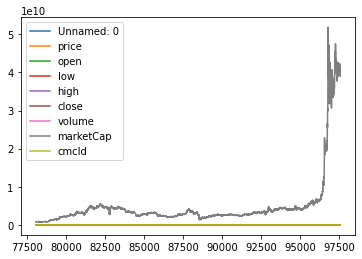

In [27]:
bnb_price.plot()

# Convert price data

## Bitcoin

In [20]:
btc_returns = pricetoreturns(btc_price)

KeyError: 'timestamp'

## Alt-coins

In [46]:
eth_returns = pricetoreturns(eth_price)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [47]:
bnb_returns = pricetoreturns(bnb_price)

In [48]:
bnb_returns

[                               price    return
 timestamp                                     
 2019-01-01 00:00:00+00:00   6.166694 -0.067313
 2019-01-01 01:00:00+00:00   6.099381 -0.067313
 2019-01-01 02:00:00+00:00   6.044125 -0.055256
 2019-01-01 03:00:00+00:00   5.977321 -0.066805
 2019-01-01 04:00:00+00:00   5.963334 -0.013987
 ...                              ...       ...
 2020-12-31 19:00:00+00:00  37.123922  0.048723
 2020-12-31 20:00:00+00:00  37.176811  0.052889
 2020-12-31 21:00:00+00:00  37.115604 -0.061208
 2020-12-31 22:00:00+00:00  37.157239  0.041635
 2020-12-31 23:00:00+00:00  37.288887  0.131649
 
 [17544 rows x 2 columns],
                                price    return
 timestamp                                     
 2019-01-01 00:00:00+00:00   6.071880 -0.063124
 2019-01-01 04:00:00+00:00   5.988717  0.007746
 2019-01-01 08:00:00+00:00   6.020251  0.011738
 2019-01-01 12:00:00+00:00   6.004766 -0.028605
 2019-01-01 16:00:00+00:00   5.909959 -0.007764
 ...       

In [49]:
xrp_returns = pricetoreturns(xrp_price)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [50]:
ltc_returns = pricetoreturns(ltc_price)

In [51]:
link_returns = pricetoreturns(link_price)

In [52]:
bch_returns = pricetoreturns(bch_price)

In [1]:
def pricetoreturns(df):
    df = df.copy()
    df = cleanprice(df)
    dfs = resampleprice(df)
    return dfs

In [2]:
def cleanprice(data):
    
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data.set_index('timestamp',inplace=True)
    
    #shorten data to 2019-2020
    data = data['2019-01-01' :'2020-12-31']
    
    #data.rename(columns={data.columns[8]: 'volume'}, inplace=True)
    data.drop(data.columns.difference(['price']), 1, inplace=True)
    #data.drop(labels=['unix','symbol'], axis=1, inplace=True)
    
    data1 = data.copy()
    
    return data1

In [44]:
#converting price to return (for different intervals)
def returns(data):

    data = data.copy()
    
    data['return'] = data['price'].diff()
    #data['%return'] = data['close'].pct_change()
    
    #data.fillna(method='bfill')
    #data.bfill(inplace=True)
    data.ffill(inplace=True)

    return data

In [3]:
def resampleprice(data):
    data = data.copy()
    
    data_1h = data.resample('1H').agg({'price': np.mean, 'return': np.mean})
    data_4h = data.resample('4H').agg({'price': np.mean, 'return': np.mean})
    data_12h = data.resample('12H').agg({'price': np.mean, 'return': np.mean})
    data_24h = data.resample('24H').agg({'price': np.mean, 'return': np.mean})
    
    dfs = [data_1h, data_4h, data_12h, data_24h]
    
    # add returns for each resample instead 
    

    for i in dfs:
        i.bfill(inplace=True)
        i.ffill(inplace=True)
    
    return dfs

# Merging Alt-coin sentiment and price dataframes

In [ ]:
eth_sentiment_returns = mergemultiple(eth_sentiment, eth_returns)

In [69]:
bnb_sentiment_returns = mergemultiple(bnb_sentiment, bnb_returns)

In [70]:
bnb_sentiment_returns

[                           count  compound  compound_change      price  \
 2019-01-01 00:00:00+00:00    5.0  0.065040         0.093335   6.166694   
 2019-01-01 01:00:00+00:00    5.0  0.065040         0.093335   6.099381   
 2019-01-01 02:00:00+00:00    4.0  0.158375         0.093335   6.044125   
 2019-01-01 03:00:00+00:00    5.0  0.127240        -0.031135   5.977321   
 2019-01-01 04:00:00+00:00    7.0  0.274271         0.147031   5.963334   
 ...                          ...       ...              ...        ...   
 2020-12-31 19:00:00+00:00   30.0  0.102660        -0.032679  37.123922   
 2020-12-31 20:00:00+00:00   30.0  0.102660        -0.032679  37.176811   
 2020-12-31 21:00:00+00:00   30.0  0.102660        -0.032679  37.115604   
 2020-12-31 22:00:00+00:00   30.0  0.102660        -0.032679  37.157239   
 2020-12-31 23:00:00+00:00   30.0  0.102660        -0.032679  37.288887   
 
                              return  
 2019-01-01 00:00:00+00:00 -0.067313  
 2019-01-01 01:00:00

In [53]:
xrp_sentiment_returns = mergemultiple(xrp_sentiment, xrp_returns)

In [57]:
ltc_sentiment_returns = mergemultiple(ltc_sentiment, ltc_returns)

In [55]:
link_sentiment_returns = mergemultiple(link_sentiment, link_returns)

In [56]:
bch_sentiment_returns = mergemultiple(bch_sentiment, bch_returns)

In [5]:
def mergemultiple(dfs1 = [], dfs2 = []):
    df1 = pd.merge(dfs1[0], dfs2[0], how='outer', left_index=True, right_index=True)
    df1=df1.copy()
    df2 = pd.merge(dfs1[1], dfs2[1], how='outer', left_index=True, right_index=True)
    df2=df2.copy()
    df3 = pd.merge(dfs1[2], dfs2[2], how='outer', left_index=True, right_index=True)
    df3=df3.copy()
    df4 = pd.merge(dfs1[3], dfs2[3], how='outer', left_index=True, right_index=True)
    df4=df4.copy()
    dfs3 = [df1,df2,df3,df4]
    
    for i in dfs3:
        i.bfill(inplace=True)
        i.ffill(inplace=True)
    
    return dfs3
    #return df1

# Shifting dataframes

In [ ]:
eth_shift = shift(eth_sentiment_returns)

In [71]:
bnb_shift = shift(bnb_sentiment_returns)

In [72]:
bnb_shift

[                           count  compound  compound_change      price  \
 2019-01-01 00:00:00+00:00    5.0  0.065040         0.093335   6.166694   
 2019-01-01 01:00:00+00:00    5.0  0.065040         0.093335   6.099381   
 2019-01-01 02:00:00+00:00    4.0  0.158375         0.093335   6.044125   
 2019-01-01 03:00:00+00:00    5.0  0.127240        -0.031135   5.977321   
 2019-01-01 04:00:00+00:00    7.0  0.274271         0.147031   5.963334   
 ...                          ...       ...              ...        ...   
 2020-12-31 19:00:00+00:00   30.0  0.102660        -0.032679  37.123922   
 2020-12-31 20:00:00+00:00   30.0  0.102660        -0.032679  37.176811   
 2020-12-31 21:00:00+00:00   30.0  0.102660        -0.032679  37.115604   
 2020-12-31 22:00:00+00:00   30.0  0.102660        -0.032679  37.157239   
 2020-12-31 23:00:00+00:00   30.0  0.102660        -0.032679  37.288887   
 
                              return    price-1  return-1    price-2  return-2  
 2019-01-01 00:00

In [58]:
xrp_shift = shift(xrp_sentiment_returns)

In [59]:
ltc_shift = shift(ltc_sentiment_returns)

In [60]:
link_shift = shift(link_sentiment_returns)

In [61]:
bch_shift = shift(bch_sentiment_returns)

In [2]:
def shift(dfs=[]):

    dfs[0]['price-1'], dfs[0]['return-1'], dfs[0]['price-2'], dfs[0]['return-2'] = [dfs[0]['price'].shift(-1), dfs[0]['return'].shift(-1),dfs[0]['price'].shift(-2), dfs[0]['return'].shift(-2)]
    dfs[1]['price-1'], dfs[1]['return-1'], dfs[1]['price-2'], dfs[1]['return-2'] = [dfs[1]['price'].shift(-1), dfs[1]['return'].shift(-1),dfs[1]['price'].shift(-2), dfs[1]['return'].shift(-2)]
    dfs[2]['price-1'], dfs[2]['return-1'], dfs[2]['price-2'], dfs[2]['return-2'] = [dfs[2]['price'].shift(-1), dfs[2]['return'].shift(-1),dfs[2]['price'].shift(-2), dfs[2]['return'].shift(-2)]
    dfs[3]['price-1'], dfs[3]['return-1'], dfs[3]['price-2'], dfs[3]['return-2'] = [dfs[3]['price'].shift(-1), dfs[3]['return'].shift(-1),dfs[3]['price'].shift(-2), dfs[3]['return'].shift(-2)]
    
    for i in dfs:
        i.ffill(inplace=True)
    
    return dfs

# Exporting shifted dfs -> final step for this NB

In [29]:
eth_shift[0].to_csv('eth_shift_1h.csv', index=True)
eth_shift[1].to_csv('eth_shift_4h.csv', index=True)
eth_shift[2].to_csv('eth_shift_12h.csv', index=True)
eth_shift[3].to_csv('eth_shift_24h.csv', index=True)

NameError: name 'eth_shift' is not defined

In [73]:
bnb_shift[0].to_csv('bnb_shift_1h.csv', index=True)
bnb_shift[1].to_csv('bnb_shift_4h.csv', index=True)
bnb_shift[2].to_csv('bnb_shift_12h.csv', index=True)
bnb_shift[3].to_csv('bnb_shift_24h.csv', index=True)

In [62]:
xrp_shift[0].to_csv('xrp_shift_1h.csv', index=True)
xrp_shift[1].to_csv('xrp_shift_4h.csv', index=True)
xrp_shift[2].to_csv('xrp_shift_12h.csv', index=True)
xrp_shift[3].to_csv('xrp_shift_24h.csv', index=True)

In [63]:
ltc_shift[0].to_csv('ltc_shift_1h.csv', index=True)
ltc_shift[1].to_csv('ltc_shift_4h.csv', index=True)
ltc_shift[2].to_csv('ltc_shift_12h.csv', index=True)
ltc_shift[3].to_csv('ltc_shift_24h.csv', index=True)

In [64]:
link_shift[0].to_csv('link_shift_1h.csv', index=True)
link_shift[1].to_csv('link_shift_4h.csv', index=True)
link_shift[2].to_csv('link_shift_12h.csv', index=True)
link_shift[3].to_csv('link_shift_24h.csv', index=True)

In [65]:
bch_shift[0].to_csv('bch_shift_1h.csv', index=True)
bch_shift[1].to_csv('bch_shift_4h.csv', index=True)
bch_shift[2].to_csv('bch_shift_12h.csv', index=True)
bch_shift[3].to_csv('bch_shift_24h.csv', index=True)

# Visualise data over time

In [ ]:
eth.shift.plot(x="compound", y=["price", "return"], kind="line", figsize=(10, 10))
plt.show()

# Finding & ranking correlations

In [18]:
# create function for correlation ranking
def rankcorrelations(data=[]):
    data0_correlated = data[0].corr().unstack().sort_values()
    data1_correlated = data[1].corr().unstack().sort_values()
    data2_correlated = data[2].corr().unstack().sort_values()
    data3_correlated = data[3].corr().unstack().sort_values()
    
    dfs = [data0_correlated, data1_correlated, data2_correlated, data3_correlated]
    return dfs

In [47]:
bnb_rankcorrelations = rankcorrelations(bnb_shift)

return    return-2   -0.028612
return-2  return     -0.028612
price     compound   -0.016258
compound  price      -0.016258
price-1   compound   -0.016183
                        ...   
return    return      1.000000
price     price       1.000000
compound  compound    1.000000
price-2   price-2     1.000000
return-2  return-2    1.000000
Length: 64, dtype: float64

In [19]:
for x in range(len(bnb_rankcorrelations)):
    display(bnb_rankcorrelations[x])

NameError: name 'bnb_rankcorrelations' is not defined

In [20]:
# correlations without ranking for heatmap
def correlations(data=[]):
    data0_correlated = data[0].corr()
    data1_correlated = data[1].corr()
    data2_correlated = data[2].corr()
    data3_correlated = data[3].corr()
    
    dfs = [data0_correlated, data1_correlated, data2_correlated, data3_correlated]
    return dfs

In [142]:
bnb_correlations = correlations(bnb_shift)
bnb_correlations[3]

,count,compound,price,return,price-1,return-1,price-2,return-2
count,1.000000,0.064335,0.389047,0.182592,0.397752,0.022821,0.397424,0.012850
compound,0.064335,1.000000,-0.070771,0.087319,-0.068874,-0.011455,-0.071440,-0.032399
price,0.389047,-0.070771,1.000000,0.012871,0.994847,-0.059874,0.986729,-0.064792
return,0.182592,0.087319,0.012871,1.000000,0.072214,0.008413,0.069178,0.016960
price-1,0.397752,-0.068874,0.994847,0.072214,1.000000,0.009867,0.994855,-0.061946
return-1,0.022821,-0.011455,-0.059874,0.008413,0.009867,1.000000,0.069151,0.009312
price-2,0.397424,-0.071440,0.986729,0.069178,0.994855,0.069151,1.000000,0.007720
return-2,0.012850,-0.032399,-0.064792,0.016960,-0.061946,0.009312,0.007720,1.000000


In [197]:
bch_rankcorrelations = rankcorrelations(bch_shift)

In [196]:
for x in range(len(bch_rankcorrelations)):
    print (bch_rankcorrelations[x])

compound    return_abs   -0.012113
return_abs  compound     -0.012113
count       return_abs    0.002306
return_abs  count         0.002306
close       return_abs    0.024616
return_abs  close         0.024616
count       close         0.080638
close       count         0.080638
compound    close         0.098486
close       compound      0.098486
count       compound      0.373717
compound    count         0.373717
count       count         1.000000
compound    compound      1.000000
close       close         1.000000
return_abs  return_abs    1.000000
dtype: float64
compound    return_abs   -0.012113
return_abs  compound     -0.012113
count       return_abs    0.002306
return_abs  count         0.002306
close       return_abs    0.024616
return_abs  close         0.024616
count       close         0.080638
close       count         0.080638
compound    close         0.098486
close       compound      0.098486
count       compound      0.373717
compound    count         0.373717
count

# Visualise correlations

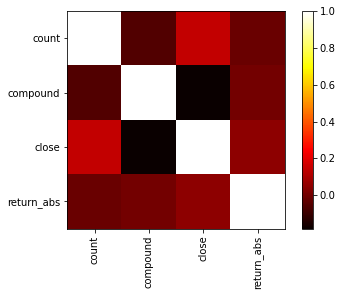

In [148]:
# create formula to show heatmaps for all 
plt.imshow(bch_correlations[4], cmap='hot', interpolation='none')
plt.colorbar()
plt.xticks(range(len(link_correlations[11])), link_correlations[11].columns,rotation=90)
plt.yticks(range(len(link_correlations[11])), link_correlations[11].columns,rotation=0);

TypeError: pairplot() got an unexpected keyword argument 'ax'

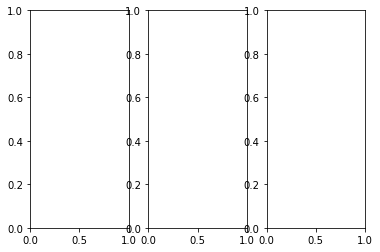

In [175]:
fig, axes = plt.subplots(1, 3)

sns.pairplot(link_shift[11],ax=[0])
axes[0].set_title('3')


sns.pairplot(link_shift[11],ax=[1])
axes[1].set_title('3')


sns.pairplot(link_shift[11],ax=[2])
axes[2].set_title('3')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1411e90a0>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13e8d1220>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14b9d34c0>,
      dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14ca8f160>,
      dtype=object)

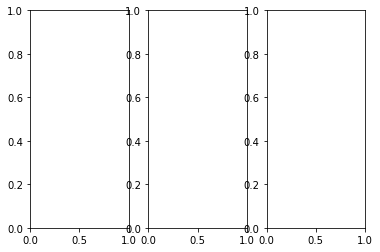

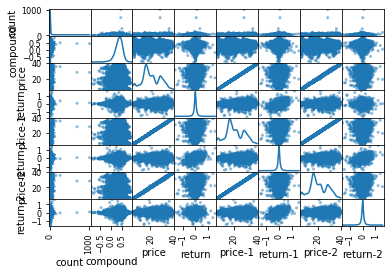

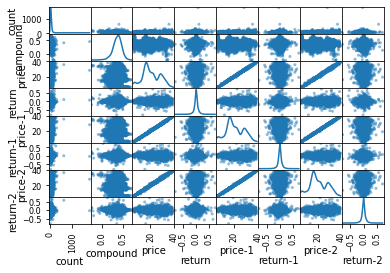

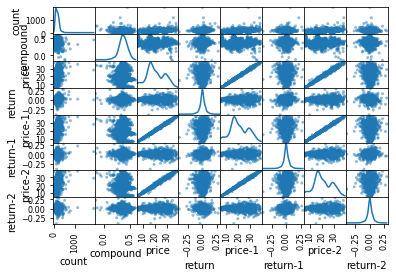

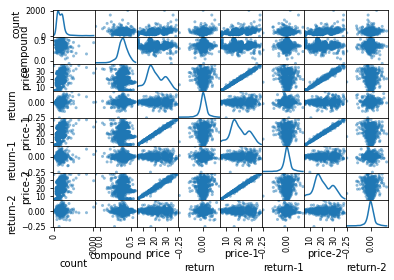

In [145]:
fig, axes = plt.subplots(1, 4)

pd.plotting.scatter_matrix(bnb_shift[0], diagonal='kde')

pd.plotting.scatter_matrix(bnb_shift[1], diagonal='kde')

pd.plotting.scatter_matrix(bnb_shift[2], diagonal='kde')

pd.plotting.scatter_matrix(bnb_shift[3], diagonal='kde')

In [ ]:
fig, axes = plt.subplots(1, 3, sharey=False)

pd.plotting.scatter_matrix(link_shift[0],ax=[0], diagonal='kde')

pd.plotting.scatter_matrix(link_shift[0],ax=[1], diagonal='kde')

pd.plotting.scatter_matrix(link_shift[2],ax=[2], diagonal='kde')


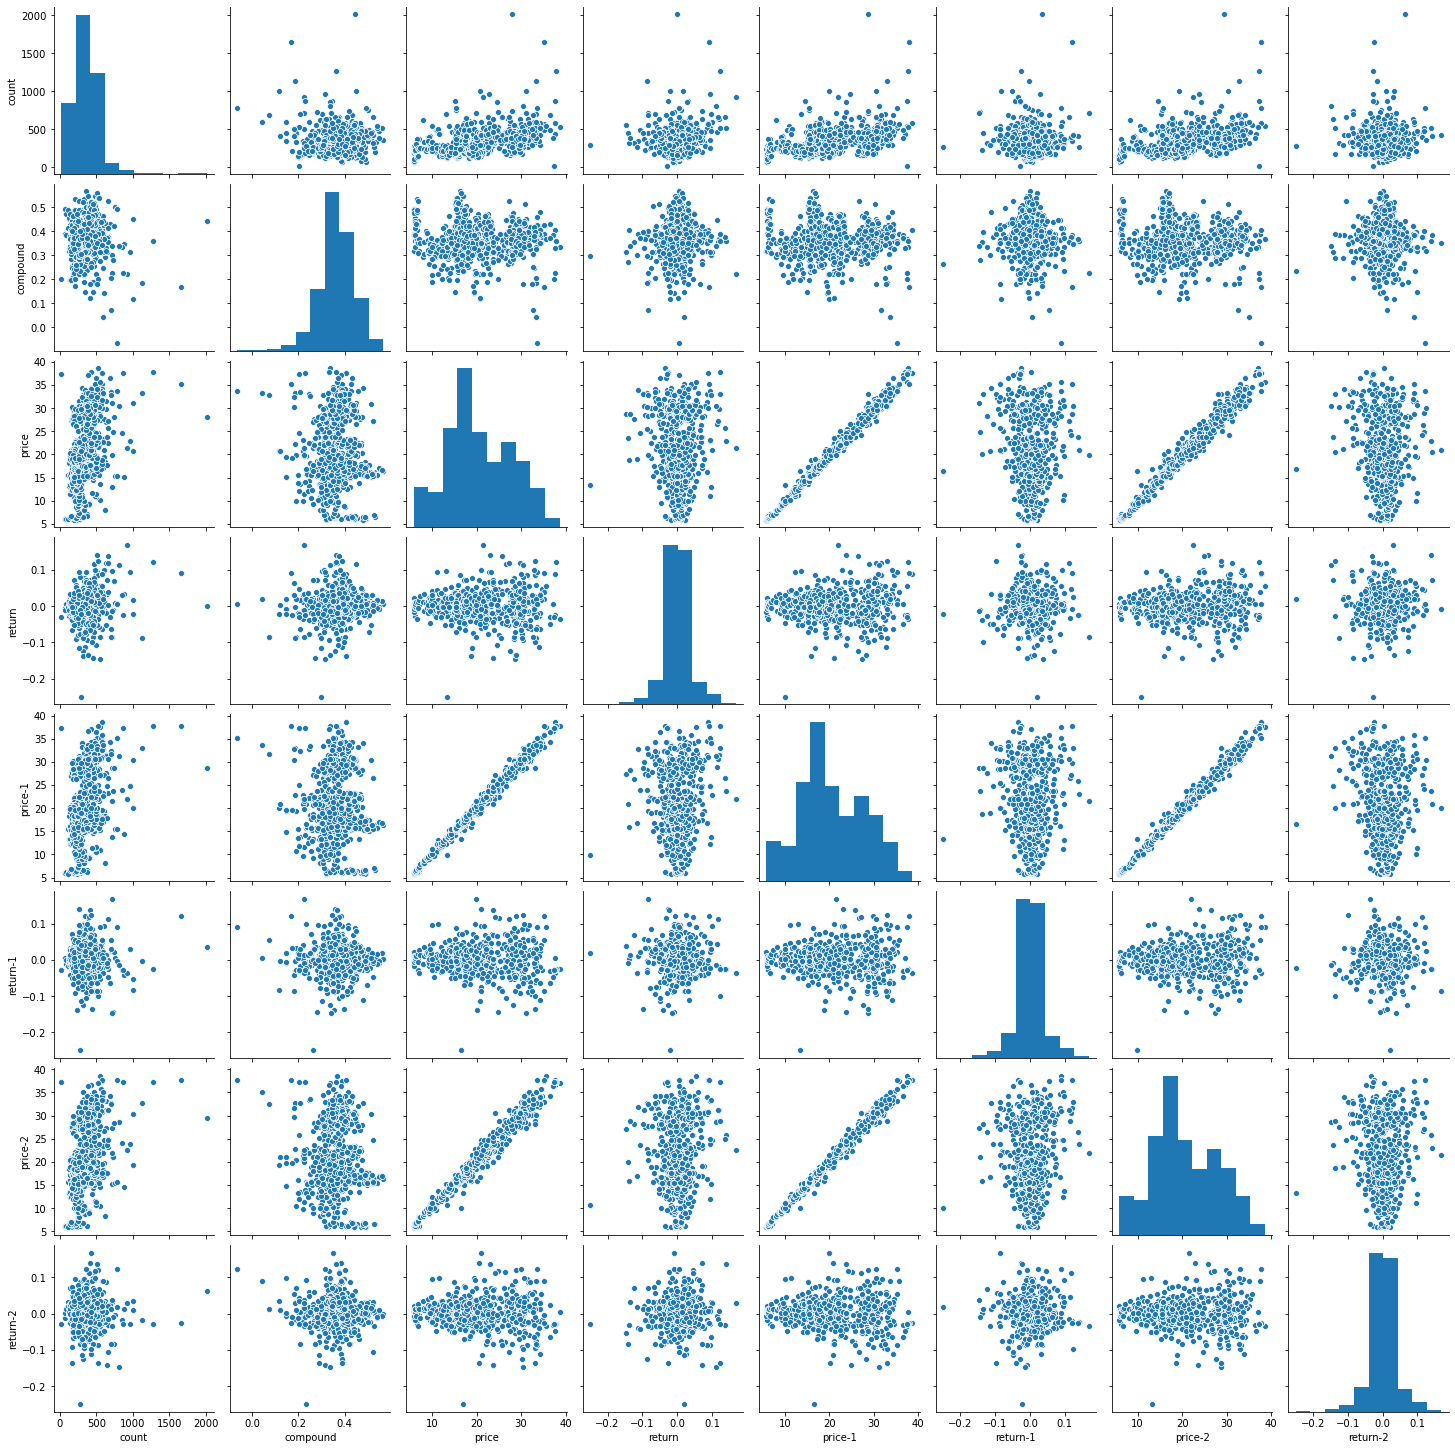

In [146]:
sns.pairplot(bnb_shift[3])

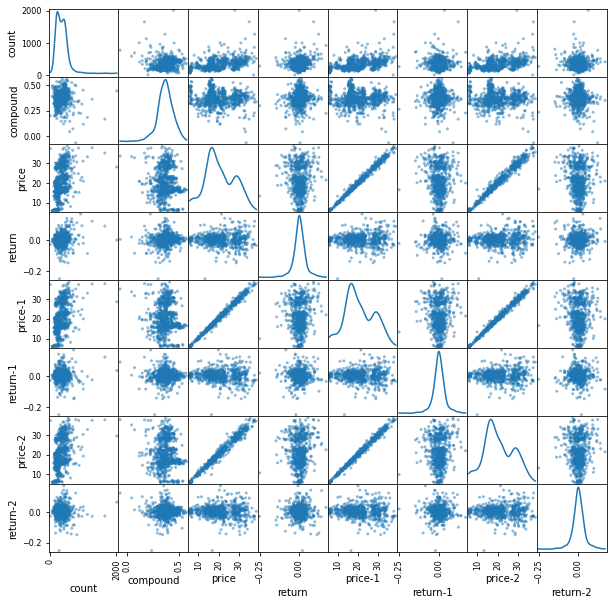

In [147]:
# Scatter matrix - interpretation of middle  line? 
pd.plotting.scatter_matrix(bnb_shift[3], diagonal='kde', figsize=(10, 10));

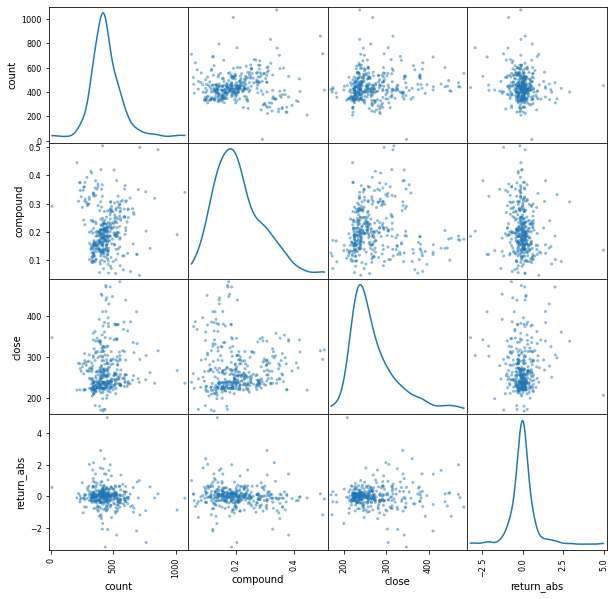

In [46]:
# Scatter matrix - interpretation of middle  line? 
pd.plotting.scatter_matrix(bch_sentiment_returns[3], diagonal='kde', figsize=(10, 10));

# Models

for multiple - just assign x to multiple columns 

#check shape is correct

#mean squared error
#r2 score

#.fit - normalise = true? - on training data

ypred = model.pred x test

performance:
coef
int
mse ytest,ypred
r2 ytest,ypred


# Linear regression working

In [95]:
X = dfs['count'].values.reshape((-1, 1))
y = dfs['return'].values

print(X.shape(), y.shape())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

slope, intercept, r_value, p_value, std_err =sp.linregress(x,y)

MSE = mean_squared_error(y_test, y_pred)
r_sq = r2_score(y_test, y_pred)

print("lr.coef_: {}".format(model.coef_))
print("lr.intercept_: {}".format(model.intercept_))
print('mean squared error', MSE)
print('coefficient of determination:', r_sq)
                         
print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

y_test = y_test.flatten()
y_pred = y_pred.flatten()
comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison['Error'] = comparison['Actual'] - comparison['Predicted']
print(comparison)

NameError: name 'dfs' is not defined

# Logistic regression working

In [104]:
from sklearn.preprocessing import Binarizer
from sklearn import preprocessing

In [126]:
y = bnb_shift[0]['return-2'].values.reshape(1, -1)
binarizer = preprocessing.Binarizer()
binary = binarizer.transform(y)

In [127]:
X = bnb_shift[0]['compound'].values.reshape((-1, 1))

In [128]:
X

array([[0.1626    ],
       [0.6335    ],
       [0.3181    ],
       ...,
       [0.33108571],
       [0.27924762],
       [0.20017333]])

In [136]:
X = bnb_shift[0]['compound'].values.reshape(-1, 1)
y = bnb_shift[0]['return-2'].values.reshape(-1, 1)

#transform y variable  with scikit learn
transformer = Binarizer()
y = binarizer.transform(y)
y = y.reshape(-1)

print(y)

# split test-train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

model = LogisticRegression().fit(X_train, y_train)

r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred),'\n')

[0. 0. 1. ... 0. 0. 0.]
coefficient of determination: 0.5114155251141552
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      2568
         1.0       0.51      1.00      0.68      2688

    accuracy                           0.51      5256
   macro avg       0.26      0.50      0.34      5256
weighted avg       0.26      0.51      0.35      5256
 



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
>>> 
>>> X = [[ 1., -1.,  2.],
...      [ 2.,  0.,  0.],
...      [ 0.,  1., -1.]]
>>> transformer = Binarizer().fit(X)  # fit does nothing.
>>> transformer
Binarizer()
>>> transformer.transform(X)
array([[1., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

## Simple Linear regression for all 4 dataframes

In [75]:
def linearreg(data = []):
    for dfs in data:

        X = dfs['compound'].values.reshape((-1, 1))
        y = dfs['return-2'].values

        print(X.shape, y.shape)

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)

        model = LinearRegression().fit(X_train, y_train)
        y_pred = model.predict(X_test)

        #slope, intercept, r_value, p_value, std_err =sp.linregress(X,y)

        MSE = mean_squared_error(y_test, y_pred)
        r_sq = r2_score(y_test, y_pred)

        print("lr.coef_: {}".format(model.coef_))
        print("lr.intercept_: {}".format(model.intercept_))
        print('mean squared error', MSE)
        print('coefficient of determination:', r_sq)

        print("Training set score: {:.2f}".format(model.score(X_train, y_train)))
        print("Test set score: {:.2f}".format(model.score(X_test, y_test)))

        y_test = y_test.flatten()
        y_pred = y_pred.flatten()
        comparison = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
        comparison['Error'] = comparison['Actual'] - comparison['Predicted']
        print(comparison)

In [76]:
linearreg(bnb_shift)

(17520, 1) (17520,)
lr.coef_: [0.00242363]
lr.intercept_: -1.8287742707972783e-05
mean squared error 0.02493080906394328
coefficient of determination: -0.00033112548839819844
Training set score: 0.00
Test set score: -0.00
        Actual  Predicted     Error
0     0.068600   0.001217  0.067383
1     0.014450   0.001349  0.013102
2    -0.025542   0.000827 -0.026369
3    -0.018477   0.001003 -0.019480
4    -0.012871   0.001237 -0.014108
...        ...        ...       ...
5251 -0.005088   0.000690 -0.005778
5252  0.186762   0.000813  0.185949
5253 -0.175485   0.000784 -0.176269
5254 -0.175485   0.000659 -0.176143
5255 -0.175485   0.000467 -0.175952

[5256 rows x 3 columns]
(4381, 1) (4381,)
lr.coef_: [0.0098591]
lr.intercept_: -0.002657426317377431
mean squared error 0.009358706701580486
coefficient of determination: -0.0012092081466246185
Training set score: 0.00
Test set score: -0.00
        Actual  Predicted     Error
0    -0.028495   0.002199 -0.030693
1    -0.035869   0.002085 -0.037

In [51]:
#change random state?
def linearreg(data = []):
    for dfs in data:
    
        X = dfs['count'].values.reshape((-1, 1))
        y = dfs['return-2'].values
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=False)
        
        model = LinearRegression().fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r_sq = model.score(X_test, y_test)

In [52]:
linearreg(bnb_shift)

        Actual  Predicted     Error
0     0.068600   0.002794  0.065807
1     0.014450   0.003165  0.011285
2    -0.025542   0.000378 -0.025920
3    -0.018477   0.000564 -0.019041
4    -0.012871   0.001307 -0.014179
...        ...        ...       ...
5251 -0.005088   0.004280 -0.009368
5252  0.186762   0.005952  0.180810
5253 -0.175485   0.003723 -0.179207
5254       NaN   0.002422       NaN
5255       NaN   0.001307       NaN

[5256 rows x 3 columns]
        Actual  Predicted     Error
0    -0.028495   0.001713 -0.030208
1    -0.035869   0.001193 -0.037063
2     0.008169   0.001564  0.006604
3     0.012292   0.001639  0.010653
4     0.012675   0.001218  0.011457
...        ...        ...       ...
1310  0.011270   0.002233  0.009037
1311  0.109571   0.003148  0.106423
1312 -0.174659   0.003890 -0.178549
1313       NaN   0.002579       NaN
1314       NaN  -0.000019       NaN

[1315 rows x 3 columns]
       Actual  Predicted     Error
0    0.022664  -0.001130  0.023794
1   -0.003771  -

## Polynomial regression for all 4 dataframes

- adapt code

In [ ]:
def polyreg(data = []):
    for dfs in data:
    
        X1 = dfs['compound_continious'].values.reshape((-1, 1))
        y1 = dfs['return_abs'].values
        
        # split test train manually
        # test, train = df.iloc[0.7*len(df)]
        
        X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0, shuffle=False)
        
        model = LinearRegression().fit(X1_train, y1_train)
        r_sq = model.score(X1_test, y1_test)
    
        print(len(dfs),'coefficient of determination:', r_sq)
        
        
        # add error calculation 

# Multiple linear regression with count + continious compound

In [94]:
def linearreg(data = []):
    for dfs in data:
    
        X1 = dfs[['count']].values.reshape((-1, 1))
        y1 = dfs['close'].values
        
        # split test train manually
        # test, train = df.iloc[0.7*len(df)]
        
        X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0, shuffle=False)
        
        model = LinearRegression().fit(X1_train, y1_train)
        r_sq = model.score(X1_test, y1_test)
        #r2_score = model.r2score(y1_train, y1_test)
    
        print(len(dfs),'coefficient of determination:', r_sq)
        #print(len(dfs),'r2 score:', r2_score)

In [95]:
linearreg(link_sentiment_returns)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

- negative r2 values -> worse than horiz line

# Linear regression for single df

# setup each regression -> later turn into subplots

# BNB

coefficient of determination: -0.00019949423317089376


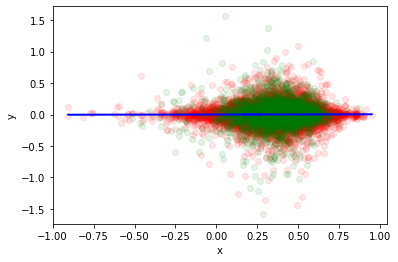

MAPE= 12.219581070927097


In [90]:
X = bnb_sentiment_returns[0]['compound'].values.reshape((-1, 1))
y = bnb_sentiment_returns[0]['return-2'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle=False)

model = LinearRegression().fit(X_train, y_train) #fit_intercept=False
r_sq = model.score(X_test, y_test)
print('coefficient of determination:', r_sq)
y_pred = model.predict(X_test)

plt.scatter(X_train, y_train, color = 'red', alpha = 0.1)
plt.scatter(X_test, y_test, color = 'green', alpha = 0.1)
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

mape = mean_absolute_error(y_test, y_pred)*100
print('MAPE=',mape)

# add all the error calculations and how to interpret 

In [232]:
#define data
X = link_sentiment_returns[3]['compound'].values.reshape((-1, 1))
y = link_sentiment_returns[3]['close'].values

In [238]:
#use polynomial regression
pr = PolynomialFeatures(degree = 2)
X_poly = pr.fit_transform(X)

X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0, shuffle=False)

#pr.fit(X_poly_train, y)
lin_reg = LinearRegression()
lin_reg.fit(X_poly_train, y)
plt.scatter(X_poly_train, y)
plt.scatter(X_poly_test, lin_reg.predict(pr.fit_transform(X_poly_test)))
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [107, 153]

In [ ]:
poly = PolynomialFeatures(degree=2)
poly_variables = poly.fit_transform(variables)

poly_var_train, poly_var_test, res_train, res_test = train_test_split(poly_variables, results, test_size = 0.3, random_state = 4)

regression = linear_model.LinearRegression()

model = regression.fit(poly_var_train, res_train)
score = model.score(poly_var_test, res_test)

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt